## 数据可视化

In [1]:
#附件1数据导入 

In [635]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
electric = pd.read_csv('E:\\IT\\大四\\python机器学习\\基于中短期能源预测\\中短期能源消耗预测\\data\\load.csv',encoding='gb2312')


In [636]:
electric.columns=['time','total_power']

In [637]:
print(electric[electric['total_power']==0].count())

time           1277
total_power    1277
dtype: int64


In [638]:
electric

,time,total_power
0,2018/1/1 0:00,244033.7682
1,2018/1/1 0:15,232720.6402
2,2018/1/1 0:30,231685.6891
3,2018/1/1 0:45,113790.6659
4,2018/1/1 1:00,116741.2135
...,...,...
128151,2021/8/31 22:45,202409.1270
128152,2021/8/31 23:00,218576.4635
128153,2021/8/31 23:15,200112.5091
128154,2021/8/31 23:30,199865.5937


In [639]:
df4 = pd.DataFrame(electric)

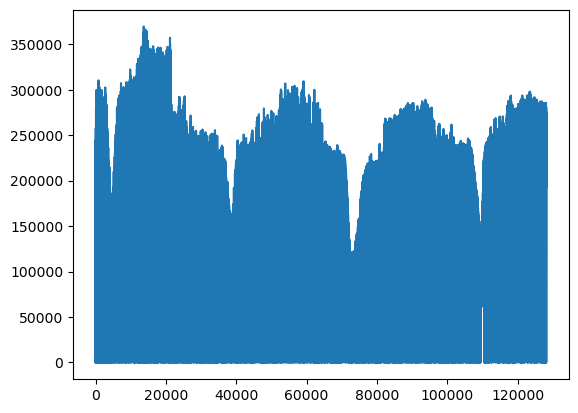

In [640]:
 # 创建折线图
plt.plot(electric['total_power'])
plt.show()

In [641]:
#大于二十万功率为闭合，大于十万功率为半打开，功率为0等于全打开

In [642]:
# # 遍历每一行并在逗号处分隔
# for i in gd:
#     list1.append(','.join(i.split(',')))

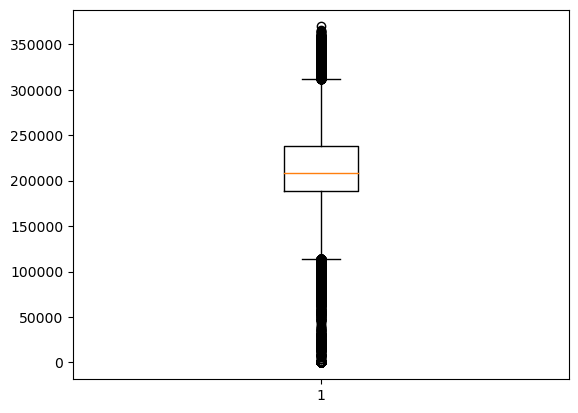

In [643]:
plt.boxplot(electric['total_power'])
plt.show()

In [644]:
#数据经过excel处理，将值划分为两列time和state，方便后续插入eletric中
tickets = pd.read_excel('E:\\IT\\大四\\python机器学习\\基于中短期能源预测\\中短期能源消耗预测\\data\\work_tickets_train2.xlsx')

In [645]:
electric

,time,total_power
0,2018/1/1 0:00,244033.7682
1,2018/1/1 0:15,232720.6402
2,2018/1/1 0:30,231685.6891
3,2018/1/1 0:45,113790.6659
4,2018/1/1 1:00,116741.2135
...,...,...
128151,2021/8/31 22:45,202409.1270
128152,2021/8/31 23:00,218576.4635
128153,2021/8/31 23:15,200112.5091
128154,2021/8/31 23:30,199865.5937


In [646]:
df1 = pd.DataFrame(electric)


In [647]:
df1[df1['total_power']==0]

,time,total_power
22,2018/1/1 5:30,0.0
23,2018/1/1 5:45,0.0
24,2018/1/1 6:00,0.0
25,2018/1/1 6:15,0.0
26,2018/1/1 6:30,0.0
...,...,...
127613,2021/8/26 8:15,0.0
127804,2021/8/28 8:00,0.0
127970,2021/8/30 1:30,0.0
128039,2021/8/30 18:45,0.0


In [648]:
#添加新列
df1['state'] = 0

In [649]:
df1

,time,total_power,state
0,2018/1/1 0:00,244033.7682,0
1,2018/1/1 0:15,232720.6402,0
2,2018/1/1 0:30,231685.6891,0
3,2018/1/1 0:45,113790.6659,0
4,2018/1/1 1:00,116741.2135,0
...,...,...,...
128151,2021/8/31 22:45,202409.1270,0
128152,2021/8/31 23:00,218576.4635,0
128153,2021/8/31 23:15,200112.5091,0
128154,2021/8/31 23:30,199865.5937,0


In [650]:
# 0是闭合，1是半开，2是全开

In [651]:
df2 = pd.DataFrame(tickets)

In [652]:
df2

,time,state
0,2018-01-01 00:45:00,半开
1,2018-01-01 01:00:00,半开
2,2018-01-01 02:00:00,半开
3,2018-01-01 02:15:00,半开
4,2018-01-01 02:30:00,半开
...,...,...
3072,2021-08-28 15:30:00,半开
3073,2021-08-29 07:30:00,半开
3074,2021-08-30 01:30:00,全开
3075,2021-08-30 18:45:00,全开


In [653]:
# 使用 replace 方法替换值  df2存在四个值  由于df2数据存在不同的值，我们用replace对其替换
df2['state'].replace({'半开': 1,'半打开': 1,'全开': 2,'开': 2,'全打开': 2}, inplace=True)

In [654]:
df2

,time,state
0,2018-01-01 00:45:00,1
1,2018-01-01 01:00:00,1
2,2018-01-01 02:00:00,1
3,2018-01-01 02:15:00,1
4,2018-01-01 02:30:00,1
...,...,...
3072,2021-08-28 15:30:00,1
3073,2021-08-29 07:30:00,1
3074,2021-08-30 01:30:00,2
3075,2021-08-30 18:45:00,2


In [655]:
#将两个表进行对比，将时间一样的值插入state，时间不一样的不理

In [656]:
# 遍历 df1 的每一行
for index, row in df1.iterrows():
    time_to_find = row['time']  
    corresponding_row = df2[df2['time'] == time_to_find]
    if not corresponding_row.empty:
        df1.at[index, 'state'] = corresponding_row['state'].values[0]

In [657]:
count = (df1['state'] == 2).sum()
print("值为0的次数:", count)
#128134 

值为0的次数: 1277


In [658]:
df1

,time,total_power,state
0,2018/1/1 0:00,244033.7682,0
1,2018/1/1 0:15,232720.6402,0
2,2018/1/1 0:30,231685.6891,0
3,2018/1/1 0:45,113790.6659,1
4,2018/1/1 1:00,116741.2135,1
...,...,...,...
128151,2021/8/31 22:45,202409.1270,0
128152,2021/8/31 23:00,218576.4635,0
128153,2021/8/31 23:15,200112.5091,0
128154,2021/8/31 23:30,199865.5937,0


In [659]:
#查看df1表state列里面不是0，1，2的值

In [660]:
#检查是否异常数据 查看两个表的异常值有什么
# 使用布尔索引选择不等于 0、1 或 2 的行
invalid_states = df1[~df1['state'].isin([0, 1, 2])]
invalid_states1 = df2[~df2['state'].isin([2, 1])]

print(invalid_states)
print(invalid_states1)

Empty DataFrame
Columns: [time, total_power, state]
Index: []
Empty DataFrame
Columns: [time, state]
Index: []


In [661]:
df1[(df1['total_power'] == 0) & (df1['state'] == 0)]
 #存在1277行total_power==0  存在1130行 total_power==0，state==0

,time,total_power,state
10028,2018/4/15 11:00,0.0,0


In [662]:
#if total_power=0,且state=0，寻找上一个值插入，
#if total_power=0,且state=1，寻找上一个值一半插入，
#if total_power=0,且state=2，插入0，

In [663]:
# # 遍历 DataFrame，根据条件操作
# for index, row in df1.iterrows():
#     if row['total_power'] == 0 and (row['state'] == 0 ):
#         # 寻找上一个值
#         prev_row = df1.iloc[index - 1] if index > 0 else row
#         # 插入上一个值或一半
#         df1.at[index, 'total_power'] = prev_row['total_power'] 
#     else: 
#         row['total_power'] == 0 and (row['state'] == 1)
#         prev_row = df1.iloc[index - 1] if index > 0 else row
#         df1.at[index, 'total_power']= prev_row['total_power'] / 2

In [664]:
# for index, row in df1.iterrows():
#     if row['total_power'] == 0 and row['state'] == 0:
#         # 寻找上一个值
#         prev_row = df1.iloc[index - 1] if index > 0 else row
#         # 插入上一个值
#         df1.at[index, 'total_power'] = prev_row['total_power']
#     elif row['total_power'] == 0 and row['state'] == 1:
#         # 寻找上一个值
#         prev_row = df1.iloc[index - 1] if index > 0 else row
#         # 插入上一个值的一半
#         df1.at[index, 'total_power'] = prev_row['total_power'] / 2
#     elif row['total_power'] == 0 and row['state'] == 2:
#         # 插入 0
#         df1.at[index, 'total_power'] = 0


In [665]:
# 处理连续存在的值 因为有的值存在连续缺失，所以我们采取上下五个值来做平均赋值
for index, row in df1.iterrows():
    if row['total_power'] == 0:
        # 寻找上下五个值
        prev_rows = df1.iloc[max(0, index - 5):min(len(df1), index + 6)]
        # 计算上下五个值的平均值
        average_total_power = prev_rows['total_power'].mean()
        if row['state'] == 0:
            # 插入上下五个值的平均值
            df1.at[index, 'total_power'] = average_total_power
        elif row['state'] == 1:
            # 插入上下五个值的平均值的一半
            df1.at[index, 'total_power'] = average_total_power / 2
        elif row['state'] == 2:
            # 插入 0
            df1.at[index, 'total_power'] = 0

In [666]:
print(df1)

                   time  total_power  state
0         2018/1/1 0:00  244033.7682      0
1         2018/1/1 0:15  232720.6402      0
2         2018/1/1 0:30  231685.6891      0
3         2018/1/1 0:45  113790.6659      1
4         2018/1/1 1:00  116741.2135      1
...                 ...          ...    ...
128151  2021/8/31 22:45  202409.1270      0
128152  2021/8/31 23:00  218576.4635      0
128153  2021/8/31 23:15  200112.5091      0
128154  2021/8/31 23:30  199865.5937      0
128155  2021/8/31 23:45  198483.5592      0

[128156 rows x 3 columns]


In [667]:
df1[(df1['total_power'] == 0) & (df1['state'] == 0)] #这些是全闭状态下为0的数据，#这些是异常数据，全闭合状态之下还是0，需要进行替换，这里采用平均值替换

,time,total_power,state


In [668]:
 df1[(df1['total_power'] == 0) & (df1['state'] == 1)] #半开 这个是电力公司维修的时候，开关半闭合，但是又因为又异常值，所以赋值为一半

,time,total_power,state


In [669]:
df1[(df1['total_power'] == 0) & (df1['state'] == 2)] #全开 这个实在电力公司进行维修的时候导致值为0

,time,total_power,state
22,2018/1/1 5:30,0.0,2
23,2018/1/1 5:45,0.0,2
24,2018/1/1 6:00,0.0,2
25,2018/1/1 6:15,0.0,2
26,2018/1/1 6:30,0.0,2
...,...,...,...
127613,2021/8/26 8:15,0.0,2
127804,2021/8/28 8:00,0.0,2
127970,2021/8/30 1:30,0.0,2
128039,2021/8/30 18:45,0.0,2


In [670]:
#查找重复值df1 

In [671]:
# df1 #128156

In [672]:
# 使用drop_duplicates()方法去除完全相同的行 发现没有完全相同行
duplicate_rows = df1[df1.duplicated(keep='first')]
print(duplicate_rows)

Empty DataFrame
Columns: [time, total_power, state]
Index: []


In [673]:
# 使用drop_duplicates()方法#去除日期列完全相同的行
df_no_duplicates = df1.drop_duplicates(subset=['time'], keep='first')
# 打印去除重复日期值后的DataFrame #发现time列没有数据重复的值
print(df_no_duplicates) 

                   time  total_power  state
0         2018/1/1 0:00  244033.7682      0
1         2018/1/1 0:15  232720.6402      0
2         2018/1/1 0:30  231685.6891      0
3         2018/1/1 0:45  113790.6659      1
4         2018/1/1 1:00  116741.2135      1
...                 ...          ...    ...
128151  2021/8/31 22:45  202409.1270      0
128152  2021/8/31 23:00  218576.4635      0
128153  2021/8/31 23:15  200112.5091      0
128154  2021/8/31 23:30  199865.5937      0
128155  2021/8/31 23:45  198483.5592      0

[128156 rows x 3 columns]


In [674]:
df1

,time,total_power,state
0,2018/1/1 0:00,244033.7682,0
1,2018/1/1 0:15,232720.6402,0
2,2018/1/1 0:30,231685.6891,0
3,2018/1/1 0:45,113790.6659,1
4,2018/1/1 1:00,116741.2135,1
...,...,...,...
128151,2021/8/31 22:45,202409.1270,0
128152,2021/8/31 23:00,218576.4635,0
128153,2021/8/31 23:15,200112.5091,0
128154,2021/8/31 23:30,199865.5937,0


In [675]:
#在df1简历年月日 小时分钟

In [676]:
df1['year'] = pd.to_datetime(df1['time'], format='%Y/%m/%d %H:%M').dt.year

In [677]:
df1['months'] = pd.to_datetime(df1['time'], format='%Y/%m/%d %H:%M').dt.month

In [678]:
df1['day'] = pd.to_datetime(df1['time'], format='%Y/%m/%d %H:%M').dt.day

In [679]:
df1['hour'] =pd.to_datetime(df1['time'], format='%Y/%m/%d %H:%M').dt.hour

In [680]:
df1['minute'] = pd.to_datetime(df1['time'], format='%Y/%m/%d %H:%M').dt.minute

In [48]:
# df1['mintues'] = pd.to_datetime(df1['time'], format='%Y/%m/%d %H:%M').dt.time

In [681]:
df1

,time,total_power,state,year,months,day,hour,minute
0,2018/1/1 0:00,244033.7682,0,2018,1,1,0,0
1,2018/1/1 0:15,232720.6402,0,2018,1,1,0,15
2,2018/1/1 0:30,231685.6891,0,2018,1,1,0,30
3,2018/1/1 0:45,113790.6659,1,2018,1,1,0,45
4,2018/1/1 1:00,116741.2135,1,2018,1,1,1,0
...,...,...,...,...,...,...,...,...
128151,2021/8/31 22:45,202409.1270,0,2021,8,31,22,45
128152,2021/8/31 23:00,218576.4635,0,2021,8,31,23,0
128153,2021/8/31 23:15,200112.5091,0,2021,8,31,23,15
128154,2021/8/31 23:30,199865.5937,0,2021,8,31,23,30


In [682]:
electric

,time,total_power
0,2018/1/1 0:00,244033.7682
1,2018/1/1 0:15,232720.6402
2,2018/1/1 0:30,231685.6891
3,2018/1/1 0:45,113790.6659
4,2018/1/1 1:00,116741.2135
...,...,...
128151,2021/8/31 22:45,202409.1270
128152,2021/8/31 23:00,218576.4635
128153,2021/8/31 23:15,200112.5091
128154,2021/8/31 23:30,199865.5937


In [683]:
# #保存df1文件
outputpath='E:\\IT\\大四\\python机器学习\\基于中短期能源预测\\中短期能源消耗预测\\data\\load_work.csv'
df1.to_csv(outputpath,sep=',',index=False,header=False)

In [52]:
#导入气象表

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras import Sequential, layers, utils

import warnings
warnings.filterwarnings('ignore')

In [54]:
#数据经过excel处理，将值划分为两列time和state，方便后续插入eletric中


In [704]:
dataset = pd.read_csv('E:\\IT\\大四\\python机器学习\\基于中短期能源预测\\中短期能源消耗预测\\data\\weather.csv',encoding='gbk')
dataset

,日期,天气状况,最高温度,最低温度,白天风力风向,夜晚风力风向
0,2018年1月1日,多云/多云,22℃,12℃,无持续风向<3级,无持续风向<3级
1,2018年1月1日,多云/多云,22℃,12℃,无持续风向<3级,无持续风向<3级
2,2018年1月2日,多云/多云,22℃,15℃,无持续风向<3级,无持续风向<3级
3,2018年1月3日,多云/阴,23℃,15℃,无持续风向<3级,无持续风向<3级
4,2018年1月4日,多云/小雨,21℃,16℃,无持续风向<3级,无持续风向<3级
...,...,...,...,...,...,...
1340,2021年8月27日,雷阵雨/雷阵雨,35℃,26℃,北风1-2级,北风1-2级
1341,2021年8月28日,雷阵雨/多云,33℃,26℃,北风1-2级,北风1-2级
1342,2021年8月29日,雷阵雨/雷阵雨,32℃,25℃,北风1-2级,北风1-2级
1343,2021年8月30日,阵雨/阵雨,34℃,26℃,北风1-2级,北风1-2级


In [705]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      1345 non-null   object
 1   天气状况    1345 non-null   object
 2   最高温度    1345 non-null   object
 3   最低温度    1345 non-null   object
 4   白天风力风向  1345 non-null   object
 5   夜晚风力风向  1345 non-null   object
dtypes: object(6)
memory usage: 63.2+ KB


In [706]:
dataset.shape

(1345, 6)

In [707]:
dataset.duplicated() 

0       False
1        True
2       False
3       False
4       False
        ...  
1340    False
1341    False
1342    False
1343    False
1344    False
Length: 1345, dtype: bool

In [708]:
dataset.duplicated().sum()


6

In [709]:
dataset = dataset.drop_duplicates(keep='first')

In [710]:
dataset

,日期,天气状况,最高温度,最低温度,白天风力风向,夜晚风力风向
0,2018年1月1日,多云/多云,22℃,12℃,无持续风向<3级,无持续风向<3级
2,2018年1月2日,多云/多云,22℃,15℃,无持续风向<3级,无持续风向<3级
3,2018年1月3日,多云/阴,23℃,15℃,无持续风向<3级,无持续风向<3级
4,2018年1月4日,多云/小雨,21℃,16℃,无持续风向<3级,无持续风向<3级
5,2018年1月5日,阴/小雨,19℃,13℃,无持续风向<3级,无持续风向<3级
...,...,...,...,...,...,...
1340,2021年8月27日,雷阵雨/雷阵雨,35℃,26℃,北风1-2级,北风1-2级
1341,2021年8月28日,雷阵雨/多云,33℃,26℃,北风1-2级,北风1-2级
1342,2021年8月29日,雷阵雨/雷阵雨,32℃,25℃,北风1-2级,北风1-2级
1343,2021年8月30日,阵雨/阵雨,34℃,26℃,北风1-2级,北风1-2级


In [711]:
series = dataset.join(dataset['天气状况'].str.split('/',expand=True))
dataset['天气1'] = series[0]
dataset['天气2'] = series[1]

In [712]:
dataset['天气1'].unique()

array(['多云', '阴', '小雨-中雨', '大雨', '中雨', '小雨', '晴', '雷阵雨', '雾', '阵雨',
       '中雨-大雨', '晴间多云', '暴雨', '小到中雨', '中到大雨', '大到暴雨'], dtype=object)

In [713]:
dataset['天气2'].unique()

array(['多云', '阴', '小雨', '中雨-大雨', '中雨', '小雨-中雨', '晴', '局部多云', '阵雨', '雾',
       '雷阵雨', '大雨', '暴雨', '中到大雨', '小到中雨', '大到暴雨'], dtype=object)

In [714]:
dataset['天气1']=dataset['天气1'].str.replace('-','到')

In [715]:
dataset['天气2']=dataset['天气2'].str.replace('-','到')

In [716]:
dataset['天气1'].unique()

array(['多云', '阴', '小雨到中雨', '大雨', '中雨', '小雨', '晴', '雷阵雨', '雾', '阵雨',
       '中雨到大雨', '晴间多云', '暴雨', '小到中雨', '中到大雨', '大到暴雨'], dtype=object)

In [717]:
dataset['天气2'].unique()

array(['多云', '阴', '小雨', '中雨到大雨', '中雨', '小雨到中雨', '晴', '局部多云', '阵雨', '雾',
       '雷阵雨', '大雨', '暴雨', '中到大雨', '小到中雨', '大到暴雨'], dtype=object)

In [718]:
dic = {'雾':0,
        '晴':1, 
        '多云':2,
        '阴':3, 
        '小雨':4,
        '小到中雨':5, 
        '中雨':6,
        '中到大雨':7,
        '大雨':8,
        '雷阵雨':9,
        '阵雨':10,
        '大到暴雨':11,
        '晴间多云':12,
        '暴雨':13,
        '小雨到中雨':14,
        '中雨到大雨':15,
        '局部多云':16
       }
dataset['天气1'] = dataset['天气1'].map(dic)
dataset['天气2'] = dataset['天气2'].map(dic)
dataset

,日期,天气状况,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2
0,2018年1月1日,多云/多云,22℃,12℃,无持续风向<3级,无持续风向<3级,2,2
2,2018年1月2日,多云/多云,22℃,15℃,无持续风向<3级,无持续风向<3级,2,2
3,2018年1月3日,多云/阴,23℃,15℃,无持续风向<3级,无持续风向<3级,2,3
4,2018年1月4日,多云/小雨,21℃,16℃,无持续风向<3级,无持续风向<3级,2,4
5,2018年1月5日,阴/小雨,19℃,13℃,无持续风向<3级,无持续风向<3级,3,4
...,...,...,...,...,...,...,...,...
1340,2021年8月27日,雷阵雨/雷阵雨,35℃,26℃,北风1-2级,北风1-2级,9,9
1341,2021年8月28日,雷阵雨/多云,33℃,26℃,北风1-2级,北风1-2级,9,2
1342,2021年8月29日,雷阵雨/雷阵雨,32℃,25℃,北风1-2级,北风1-2级,9,9
1343,2021年8月30日,阵雨/阵雨,34℃,26℃,北风1-2级,北风1-2级,10,10


In [719]:
dataset.duplicated().sum()

0

In [70]:
# dataset['年'] = pd.to_datetime(dataset['日期'],format='%Y年%m月%d日').dt.year

In [71]:
# dataset['月份'] = pd.to_datetime(dataset['日期'],format='%Y年%m月%d日').dt.month

In [72]:
# dataset['日'] = pd.to_datetime(dataset['日期'],format='%Y年%m月%d日').dt.day

In [720]:
dataset[['最高温度','最低温度']] = dataset[['最高温度','最低温度']].astype(str)
dataset[['最高温度','最低温度']] = dataset[['最高温度','最低温度']].apply(lambda x: x.str.replace('℃','').replace('', '0'))
dataset.head()

,日期,天气状况,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2
0,2018年1月1日,多云/多云,22,12,无持续风向<3级,无持续风向<3级,2,2
2,2018年1月2日,多云/多云,22,15,无持续风向<3级,无持续风向<3级,2,2
3,2018年1月3日,多云/阴,23,15,无持续风向<3级,无持续风向<3级,2,3
4,2018年1月4日,多云/小雨,21,16,无持续风向<3级,无持续风向<3级,2,4
5,2018年1月5日,阴/小雨,19,13,无持续风向<3级,无持续风向<3级,3,4


In [721]:
dataset.drop(columns=['天气状况'], axis=1, inplace=True)
dataset

,日期,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2
0,2018年1月1日,22,12,无持续风向<3级,无持续风向<3级,2,2
2,2018年1月2日,22,15,无持续风向<3级,无持续风向<3级,2,2
3,2018年1月3日,23,15,无持续风向<3级,无持续风向<3级,2,3
4,2018年1月4日,21,16,无持续风向<3级,无持续风向<3级,2,4
5,2018年1月5日,19,13,无持续风向<3级,无持续风向<3级,3,4
...,...,...,...,...,...,...,...
1340,2021年8月27日,35,26,北风1-2级,北风1-2级,9,9
1341,2021年8月28日,33,26,北风1-2级,北风1-2级,9,2
1342,2021年8月29日,32,25,北风1-2级,北风1-2级,9,9
1343,2021年8月30日,34,26,北风1-2级,北风1-2级,10,10


In [722]:
dataset['白天风力风向']=dataset['白天风力风向'].str.replace('-','～')

In [723]:
dataset['夜晚风力风向']=dataset['夜晚风力风向'].str.replace('-','～')

In [724]:
dataset['白天风力风向'].unique()

array(['无持续风向<3级', '北风4～5级', '微风<3级', '北风3', '东北风3～4级', '北风3～4级',
       '南风3～4级', '南风4～5级', '东北偏东风2', '无持续风向微风', '无持续风向1～2级', '东风3～4级',
       '东南风4～5级', '东风8～9级', '东南风3～4级', '南风1～2级', '东南风1～2级', '西南风3～4级',
       '东风1～2级', '北风1～2级', '东北风1～2级', '西南风1～2级'], dtype=object)

In [726]:
dataset['夜晚风力风向'].unique()

array(['无持续风向<3级', '北风4～5级', '北风3～4级', '微风<3级', '北风3', '东北偏东风2',
       '无持续风向微风', '无持续风向1～2级', '东风3～4级', '东南风4～5级', '东南风3～4级', '东北风3～4级',
       '东风8～9级', '南风3～4级', '南风1～2级', '东南风1～2级', '西南风3～4级', '东风1～2级',
       '北风1～2级', '东北风1～2级', '西南风1～2级'], dtype=object)

In [727]:
dic2 = {'无持续风向<3级':0,'北风3～4级':1,'北风4～5级':2,'微风<3级':3,'北风3':4,'东北风3～4级':5,'东北偏东风2':6,
       '南风3～4级':7,'南风4～5级':8,'无持续风向微风':9,'无持续风向1～2级':10,'东风3～4级':11,'东南风4～5级':12,
       '东风8～9级':13,'东南风3～4级':14,'南风1～2级':15,'东南风1～2级':16,'西南风3～4级':17,'东风1～2级':18,
       '北风1～2级':18,'东北风1～2级':19,'西南风1～2级':20,'东风1～2级':21
      }
dataset['白天风力风向'] = dataset['白天风力风向'].map(dic2)
dataset['夜晚风力风向'] = dataset['夜晚风力风向'].map(dic2)

In [728]:
dataset

,日期,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2
0,2018年1月1日,22,12,0,0,2,2
2,2018年1月2日,22,15,0,0,2,2
3,2018年1月3日,23,15,0,0,2,3
4,2018年1月4日,21,16,0,0,2,4
5,2018年1月5日,19,13,0,0,3,4
...,...,...,...,...,...,...,...
1340,2021年8月27日,35,26,18,18,9,9
1341,2021年8月28日,33,26,18,18,9,2
1342,2021年8月29日,32,25,18,18,9,9
1343,2021年8月30日,34,26,18,18,10,10


In [732]:
df3

,日期,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2
0,2018年1月1日,22,12,0,0,2,2
2,2018年1月2日,22,15,0,0,2,2
3,2018年1月3日,23,15,0,0,2,3
4,2018年1月4日,21,16,0,0,2,4
5,2018年1月5日,19,13,0,0,3,4
...,...,...,...,...,...,...,...
1340,2021年8月27日,35,26,18,18,9,9
1341,2021年8月28日,33,26,18,18,9,2
1342,2021年8月29日,32,25,18,18,9,9
1343,2021年8月30日,34,26,18,18,10,10


In [733]:
df3 = pd.DataFrame(dataset)

In [734]:
df3

,日期,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2
0,2018年1月1日,22,12,0,0,2,2
2,2018年1月2日,22,15,0,0,2,2
3,2018年1月3日,23,15,0,0,2,3
4,2018年1月4日,21,16,0,0,2,4
5,2018年1月5日,19,13,0,0,3,4
...,...,...,...,...,...,...,...
1340,2021年8月27日,35,26,18,18,9,9
1341,2021年8月28日,33,26,18,18,9,2
1342,2021年8月29日,32,25,18,18,9,9
1343,2021年8月30日,34,26,18,18,10,10


In [735]:
def is_weekend(date):
    return date.weekday()>=5

df3['日期'] = pd.to_datetime(df3['日期'],format='%Y年%m月%d日')
df3['IsWeekend'] = df3['日期'].apply(is_weekend)
df3['IsWeekend'] = df3['IsWeekend'].replace({True: 1, False: 0})
df3

,日期,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2,IsWeekend
0,2018-01-01,22,12,0,0,2,2,0
2,2018-01-02,22,15,0,0,2,2,0
3,2018-01-03,23,15,0,0,2,3,0
4,2018-01-04,21,16,0,0,2,4,0
5,2018-01-05,19,13,0,0,3,4,0
...,...,...,...,...,...,...,...,...
1340,2021-08-27,35,26,18,18,9,9,0
1341,2021-08-28,33,26,18,18,9,2,1
1342,2021-08-29,32,25,18,18,9,9,1
1343,2021-08-30,34,26,18,18,10,10,0


In [736]:
# 修改列名
new_column_names = {
    '日期': 'time',
    '最高温度': 'Max_Temperature',
    '最低温度': 'Min_Temperature',
    '白天风力风向': 'Day_Wind',
    '夜晚风力风向': 'Night_Wind',
    '天气1': 'Weather1',
    '天气2': 'Weather2',
    '平均温度': 'Average_Temperature',
    'IsWeekend': 'IsWeekend'
    
}

df3 = df3.rename(columns=new_column_names)

In [737]:
df3

,time,Max_Temperature,Min_Temperature,Day_Wind,Night_Wind,Weather1,Weather2,IsWeekend
0,2018-01-01,22,12,0,0,2,2,0
2,2018-01-02,22,15,0,0,2,2,0
3,2018-01-03,23,15,0,0,2,3,0
4,2018-01-04,21,16,0,0,2,4,0
5,2018-01-05,19,13,0,0,3,4,0
...,...,...,...,...,...,...,...,...
1340,2021-08-27,35,26,18,18,9,9,0
1341,2021-08-28,33,26,18,18,9,2,1
1342,2021-08-29,32,25,18,18,9,9,1
1343,2021-08-30,34,26,18,18,10,10,0


In [85]:
#保存df3文件
# outputpath='E:\\IT\\大四\\python机器学习\\基于中短期能源预测\\中短期能源消耗预测\\data\\weather_first.xlsx'
# df3.to_excel(outputpath,index=False,header=True)


In [86]:
# train1 = pd.DataFrame(df1)
# train1['new_time'] = df1['time']
# train1

In [738]:
df3.shape

(1339, 8)

In [739]:

df1['time'] = pd.to_datetime(df1['time'], format='%Y/%m/%d', errors='ignore')
df3['time'] = pd.to_datetime(df3['time'], format='%Y/%m/%d', errors='coerce')

In [740]:
df1

,time,total_power,state,year,months,day,hour,minute
0,2018/1/1 0:00,244033.7682,0,2018,1,1,0,0
1,2018/1/1 0:15,232720.6402,0,2018,1,1,0,15
2,2018/1/1 0:30,231685.6891,0,2018,1,1,0,30
3,2018/1/1 0:45,113790.6659,1,2018,1,1,0,45
4,2018/1/1 1:00,116741.2135,1,2018,1,1,1,0
...,...,...,...,...,...,...,...,...
128151,2021/8/31 22:45,202409.1270,0,2021,8,31,22,45
128152,2021/8/31 23:00,218576.4635,0,2021,8,31,23,0
128153,2021/8/31 23:15,200112.5091,0,2021,8,31,23,15
128154,2021/8/31 23:30,199865.5937,0,2021,8,31,23,30


In [741]:

df1= df1.rename(columns={'time':'time'})
df1['time'] = df1['time'].apply(lambda x: x.split(' ')[0])


In [742]:

# 将df1的时间列转换为datetime格式
df1['time'] = pd.to_datetime(df1['time'], format='%Y/%m/%d', errors='coerce')
# 将df3的时间列转换为datetime格式
df3['time'] = pd.to_datetime(df3['time'], format='%Y年%m月%d日', errors='coerce')
# 使用merge合并两个表

train = df1.merge(df3, on='time', how='left')


In [743]:
train.drop('time', axis=1, inplace=True)


In [744]:
train

,total_power,state,year,months,day,hour,minute,Max_Temperature,Min_Temperature,Day_Wind,Night_Wind,Weather1,Weather2,IsWeekend
0,244033.7682,0,2018,1,1,0,0,22,12,0,0,2,2,0
1,232720.6402,0,2018,1,1,0,15,22,12,0,0,2,2,0
2,231685.6891,0,2018,1,1,0,30,22,12,0,0,2,2,0
3,113790.6659,1,2018,1,1,0,45,22,12,0,0,2,2,0
4,116741.2135,1,2018,1,1,1,0,22,12,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128151,202409.1270,0,2021,8,31,22,45,32,26,18,18,9,10,0
128152,218576.4635,0,2021,8,31,23,0,32,26,18,18,9,10,0
128153,200112.5091,0,2021,8,31,23,15,32,26,18,18,9,10,0
128154,199865.5937,0,2021,8,31,23,30,32,26,18,18,9,10,0


## 数据可视化

In [93]:
df1

,time,total_power,state,year,months,day,hour,minute
0,2018-01-01,244033.7682,0,2018,1,1,0,0
1,2018-01-01,232720.6402,0,2018,1,1,0,15
2,2018-01-01,231685.6891,0,2018,1,1,0,30
3,2018-01-01,113790.6659,1,2018,1,1,0,45
4,2018-01-01,116741.2135,1,2018,1,1,1,0
...,...,...,...,...,...,...,...,...
128151,2021-08-31,202409.1270,0,2021,8,31,22,45
128152,2021-08-31,218576.4635,0,2021,8,31,23,0
128153,2021-08-31,200112.5091,0,2021,8,31,23,15
128154,2021-08-31,199865.5937,0,2021,8,31,23,30


## 数据建模

### LSTM预测

In [94]:
train #128156条数据 y是total_power x是12列特征

,total_power,state,year,months,day,hour,minute,Max_Temperature,Min_Temperature,Day_Wind,Night_Wind,weather,Average_Temperature,IsWeekend
0,244033.7682,0,2018,1,1,0,0,22,12,0,0,2,17.0,0
1,232720.6402,0,2018,1,1,0,15,22,12,0,0,2,17.0,0
2,231685.6891,0,2018,1,1,0,30,22,12,0,0,2,17.0,0
3,113790.6659,1,2018,1,1,0,45,22,12,0,0,2,17.0,0
4,116741.2135,1,2018,1,1,1,0,22,12,0,0,2,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128151,202409.1270,0,2021,8,31,22,45,32,26,18,18,9,29.0,0
128152,218576.4635,0,2021,8,31,23,0,32,26,18,18,9,29.0,0
128153,200112.5091,0,2021,8,31,23,15,32,26,18,18,9,29.0,0
128154,199865.5937,0,2021,8,31,23,30,32,26,18,18,9,29.0,0


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import tushare as ts
import torch
from torch import nn
import datetime
import time


In [97]:
# pip install tushare -i https://pypi.tuna.tsinghua.edu.cn/simple

In [98]:
# pip install tensorflow -i https://pypi.tuna.tsinghua.edu.cn/simple

In [99]:
train

,total_power,state,year,months,day,hour,minute,Max_Temperature,Min_Temperature,Day_Wind,Night_Wind,weather,Average_Temperature,IsWeekend
0,244033.7682,0,2018,1,1,0,0,22,12,0,0,2,17.0,0
1,232720.6402,0,2018,1,1,0,15,22,12,0,0,2,17.0,0
2,231685.6891,0,2018,1,1,0,30,22,12,0,0,2,17.0,0
3,113790.6659,1,2018,1,1,0,45,22,12,0,0,2,17.0,0
4,116741.2135,1,2018,1,1,1,0,22,12,0,0,2,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128151,202409.1270,0,2021,8,31,22,45,32,26,18,18,9,29.0,0
128152,218576.4635,0,2021,8,31,23,0,32,26,18,18,9,29.0,0
128153,200112.5091,0,2021,8,31,23,15,32,26,18,18,9,29.0,0
128154,199865.5937,0,2021,8,31,23,30,32,26,18,18,9,29.0,0


In [100]:
# train['minute'].dtype

dtype('int32')

In [101]:
# train['mintues'] = train['mintues'].astype(str) #转换为字符串类型


In [102]:
# train['mintues'] = train['mintues'].str.split(':').str[:2].str.join(':')

In [103]:
# train

,total_power,state,year,months,day,hour,minute,Max_Temperature,Min_Temperature,Day_Wind,Night_Wind,weather,Average_Temperature,IsWeekend
0,244033.7682,0,2018,1,1,0,0,22,12,0,0,2,17.0,0
1,232720.6402,0,2018,1,1,0,15,22,12,0,0,2,17.0,0
2,231685.6891,0,2018,1,1,0,30,22,12,0,0,2,17.0,0
3,113790.6659,1,2018,1,1,0,45,22,12,0,0,2,17.0,0
4,116741.2135,1,2018,1,1,1,0,22,12,0,0,2,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128151,202409.1270,0,2021,8,31,22,45,32,26,18,18,9,29.0,0
128152,218576.4635,0,2021,8,31,23,0,32,26,18,18,9,29.0,0
128153,200112.5091,0,2021,8,31,23,15,32,26,18,18,9,29.0,0
128154,199865.5937,0,2021,8,31,23,30,32,26,18,18,9,29.0,0


In [104]:
# import pandas as pd

# # 假设 train 是你的数据表
# # 移除 "Max_Temperature" 和 "Min_Temperature" 列
# train.drop(["Max_Temperature", "Min_Temperature"], axis=1, inplace=True)
# train 

In [105]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [106]:
from tensorflow.keras.layers import Dropout

In [107]:
# 2. 数据预处理
# scaler = MinMaxScaler() #归一化
# X = train[['state', 'year','months','day','mintues','Max_Temperature','Min_Temperature','Day_Wind','Night_Wind','weather', 'Average_Temperature','IsWeekend']].values
# X = X.reshape(-1, 1)
# y = train['total_power'].values
# X = scaler.fit_transform(X)

In [122]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
# 1. 数据收集和预处理


# 创建一个 MinMaxScaler
scaler = MinMaxScaler()

# # 假设'mintues'列包含格式为'HH:MM'的时间字符串
# # train['mintues'] = train['mintues'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

# # 提取特征列
# X = train[['state', 'hour', 'minute', 'Max_Temperature', 'Min_Temperature','Day_Wind','Night_Wind' ,'weather' ]].values

# # 对特征变量进行归一化
# X = scaler.fit_transform(X)

# # 假设您想要保持'y'不变
# y = train['total_power'].values
# #对y值归一化
# y = y.reshape(-1, 1)
# y = scaler.fit_transform(y)


In [123]:
# train[:-25631]
train

,total_power,state,year,months,day,hour,minute,Max_Temperature,Min_Temperature,Day_Wind,Night_Wind,weather,Average_Temperature,IsWeekend
0,244033.7682,0,2018,1,1,0,0,22,12,0,0,2,17.0,0
1,232720.6402,0,2018,1,1,0,15,22,12,0,0,2,17.0,0
2,231685.6891,0,2018,1,1,0,30,22,12,0,0,2,17.0,0
3,113790.6659,1,2018,1,1,0,45,22,12,0,0,2,17.0,0
4,116741.2135,1,2018,1,1,1,0,22,12,0,0,2,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128151,202409.1270,0,2021,8,31,22,45,32,26,18,18,9,29.0,0
128152,218576.4635,0,2021,8,31,23,0,32,26,18,18,9,29.0,0
128153,200112.5091,0,2021,8,31,23,15,32,26,18,18,9,29.0,0
128154,199865.5937,0,2021,8,31,23,30,32,26,18,18,9,29.0,0


In [124]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)


# n_steps = 1  # 假设您的时间序列有1个时间步
# n_features = 8  # 假设您有11个特征

# # 确保batch_size与数据中的样本数量相匹配
# batch_size = len(X_train)  # 使用所有的训练样本作为一个批次

# # 重塑数据为LSTM模型的形状
# X_train = X_train.reshape(batch_size, n_steps, n_features)
# X_val = X_val.reshape(len(X_val), n_steps, n_features)  # 验证集的batch_size根据验证集的样本数量自动确定




In [125]:
from tensorflow.keras.losses import Huber

In [129]:
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# import numpy as np
# # 4. 创建LSTM模型
# model = Sequential()
# model.add(LSTM(50, activation='relu',return_sequences=False,input_shape=(n_steps, n_features))) #return_sequences=True 返回三维数据 符合下一个lstm使用 return_sequences=True,
# # model.add(LSTM(64, activation='relu'))

# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mae') #

# # 5. 模型训练
# model.fit(X_train, y_train, epochs=150, validation_data=(X_val, y_val))

# # 6. 模型评估
# y_pred = model.predict(X_val)


Epoch 1/150
3204/3204 [==============================] - 5s 1ms/step - loss: 0.0722 - val_loss: 0.0509
Epoch 2/150
3204/3204 [==============================] - 4s 1ms/step - loss: 0.0591 - val_loss: 0.0479
Epoch 3/150
3204/3204 [==============================] - 4s 1ms/step - loss: 0.0564 - val_loss: 0.0454
Epoch 4/150
3204/3204 [==============================] - 4s 1ms/step - loss: 0.0544 - val_loss: 0.0421
Epoch 5/150
3204/3204 [==============================] - 4s 1ms/step - loss: 0.0533 - val_loss: 0.0420
Epoch 6/150
3204/3204 [==============================] - 4s 1ms/step - loss: 0.0529 - val_loss: 0.0429
Epoch 7/150
3204/3204 [==============================] - 4s 1ms/step - loss: 0.0525 - val_loss: 0.0428
Epoch 8/150
3204/3204 [==============================] - 4s 1ms/step - loss: 0.0523 - val_loss: 0.0446
Epoch 9/150
3204/3204 [==============================] - 4s 1ms/step - loss: 0.0521 - val_loss: 0.0412
Epoch 10/150
3204/3204 [==============================] - 4s 1ms/step - l

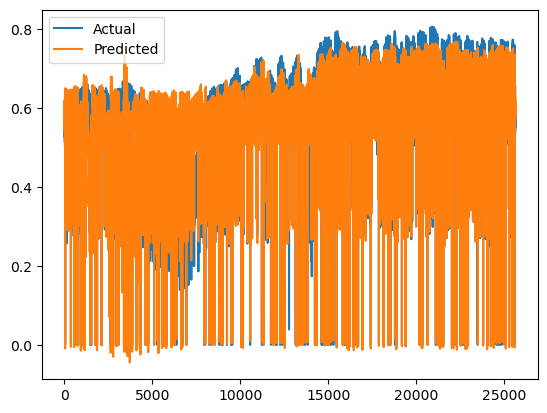

In [189]:
# import matplotlib.pyplot as plt
# plt.plot(y_val, label='Actual')
# plt.plot(y_pred, label='Predicted')
# plt.legend()
# plt.show()

In [119]:
from sklearn.metrics import accuracy_score

In [190]:
# # 计算R方
# r2 = r2_score(y_val, y_pred)

# # 计算平均绝对误差
# mae = mean_absolute_error(y_val, y_pred)

# # 计算均方误差
# mse = mean_squared_error(y_val, y_pred)




# # 打印评估结果
# print(f"R方 (R-squared): {r2:.2f}")
# print(f"平均绝对误差 (MAE): {mae:.2f}")
# print(f"均方误差 (MSE): {mse:.2f}")

# # R方 (R-squared): 0.17                   #1成lstm mae损失函数
# # 平均绝对误差 (MAE): 30454.65
# # 均方误差 (MSE): 1319002673.40

# # R方 (R-squared): 0.43     #这是2层lstm 
# # 平均绝对误差 (MAE): 24205.61
# # 均方误差 (MSE): 905418897.06
# # 绝对百分比误差 (APE): inf%

# #3层lstm
# # R方 (R-squared): 0.28
# # 平均绝对误差 (MAE): 24437.01
# # 均方误差 (MSE): 1158773933.70
# # 绝对百分比误差 (APE): inf%

# # 切换RMSprop的损失函数 2层lstm +rmsprop +损失函数 mae
# # R方 (R-squared): 0.42
# # 平均绝对误差 (MAE): 24571.32
# # 均方误差 (MSE): 928633649.69
# # 绝对百分比误差 (APE): inf%


# #  将时间列划分为小时分中后的预测 训练200  1层lstm 没归一化
# # R方 (R-squared): 0.62
# # 平均绝对误差 (MAE): 17999.72
# # 均方误差 (MSE): 601333381.51
# # 绝对百分比误差 (APE): inf%

# #R方 (R-squared): 0.38 2层lstm
# # 平均绝对误差 (MAE): 21568.59
# # 均方误差 (MSE): 992914632.98
# # 绝对百分比误差 (APE): inf%

# #1层lstm 归一化
# # R方 (R-squared): 0.49
# # 平均绝对误差 (MAE): 0.05
# # 均方误差 (MSE): 0.01
# # 绝对百分比误差 (APE): inf%

# #2lstm
# # R方 (R-squared): -0.11
# # 平均绝对误差 (MAE): 0.08
# # 均方误差 (MSE): 0.01

R方 (R-squared): 0.55
平均绝对误差 (MAE): 0.04
均方误差 (MSE): 0.01


In [116]:
?LSTM

Init signature:
LSTM(
    units,
    activation='tanh',
    recurrent_activation='sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    time_major=False,
    unroll=False,
    **kwargs,
)
Docstring:     
Long Short-Term Memory layer - Hochreiter 1997.

See [the Keras RNN API guide](https://www.tensorflow.org/guide/keras/rnn)
for details about the usage of RNN API.

Based on available runtime hardware and constraints, this layer
will choose different implementations (cuDNN-based or pure-TensorFlow)
to maximize the performance. If a GP

In [117]:
import tensorflow

### xgb训练

In [749]:
train

,total_power,state,year,months,day,hour,minute,Max_Temperature,Min_Temperature,Day_Wind,Night_Wind,Weather1,Weather2,IsWeekend
0,244033.7682,0,2018,1,1,0,0,22,12,0,0,2,2,0
1,232720.6402,0,2018,1,1,0,15,22,12,0,0,2,2,0
2,231685.6891,0,2018,1,1,0,30,22,12,0,0,2,2,0
3,113790.6659,1,2018,1,1,0,45,22,12,0,0,2,2,0
4,116741.2135,1,2018,1,1,1,0,22,12,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128151,202409.1270,0,2021,8,31,22,45,32,26,18,18,9,10,0
128152,218576.4635,0,2021,8,31,23,0,32,26,18,18,9,10,0
128153,200112.5091,0,2021,8,31,23,15,32,26,18,18,9,10,0
128154,199865.5937,0,2021,8,31,23,30,32,26,18,18,9,10,0


In [750]:
df1

,time,total_power,state,year,months,day,hour,minute
0,2018-01-01,244033.7682,0,2018,1,1,0,0
1,2018-01-01,232720.6402,0,2018,1,1,0,15
2,2018-01-01,231685.6891,0,2018,1,1,0,30
3,2018-01-01,113790.6659,1,2018,1,1,0,45
4,2018-01-01,116741.2135,1,2018,1,1,1,0
...,...,...,...,...,...,...,...,...
128151,2021-08-31,202409.1270,0,2021,8,31,22,45
128152,2021-08-31,218576.4635,0,2021,8,31,23,0
128153,2021-08-31,200112.5091,0,2021,8,31,23,15
128154,2021-08-31,199865.5937,0,2021,8,31,23,30


In [751]:
result = pd.concat([df4, train],axis=1) #两表进行连接

In [752]:
result

,time,total_power,total_power,state,year,months,day,hour,minute,Max_Temperature,Min_Temperature,Day_Wind,Night_Wind,Weather1,Weather2,IsWeekend
0,2018/1/1 0:00,244033.7682,244033.7682,0,2018,1,1,0,0,22,12,0,0,2,2,0
1,2018/1/1 0:15,232720.6402,232720.6402,0,2018,1,1,0,15,22,12,0,0,2,2,0
2,2018/1/1 0:30,231685.6891,231685.6891,0,2018,1,1,0,30,22,12,0,0,2,2,0
3,2018/1/1 0:45,113790.6659,113790.6659,1,2018,1,1,0,45,22,12,0,0,2,2,0
4,2018/1/1 1:00,116741.2135,116741.2135,1,2018,1,1,1,0,22,12,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128151,2021/8/31 22:45,202409.1270,202409.1270,0,2021,8,31,22,45,32,26,18,18,9,10,0
128152,2021/8/31 23:00,218576.4635,218576.4635,0,2021,8,31,23,0,32,26,18,18,9,10,0
128153,2021/8/31 23:15,200112.5091,200112.5091,0,2021,8,31,23,15,32,26,18,18,9,10,0
128154,2021/8/31 23:30,199865.5937,199865.5937,0,2021,8,31,23,30,32,26,18,18,9,10,0


In [753]:
result = result.T.drop_duplicates().T#删除重复列

In [754]:
result

,time,total_power,state,year,months,day,hour,minute,Max_Temperature,Min_Temperature,Day_Wind,Night_Wind,Weather1,Weather2,IsWeekend
0,2018/1/1 0:00,244033.7682,0,2018,1,1,0,0,22,12,0,0,2,2,0
1,2018/1/1 0:15,232720.6402,0,2018,1,1,0,15,22,12,0,0,2,2,0
2,2018/1/1 0:30,231685.6891,0,2018,1,1,0,30,22,12,0,0,2,2,0
3,2018/1/1 0:45,113790.6659,1,2018,1,1,0,45,22,12,0,0,2,2,0
4,2018/1/1 1:00,116741.2135,1,2018,1,1,1,0,22,12,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128151,2021/8/31 22:45,202409.127,0,2021,8,31,22,45,32,26,18,18,9,10,0
128152,2021/8/31 23:00,218576.4635,0,2021,8,31,23,0,32,26,18,18,9,10,0
128153,2021/8/31 23:15,200112.5091,0,2021,8,31,23,15,32,26,18,18,9,10,0
128154,2021/8/31 23:30,199865.5937,0,2021,8,31,23,30,32,26,18,18,9,10,0


In [169]:
# result['time'] = pd.to_datetime(result['time'])
# result.set_index('time', inplace=True)

In [170]:
# result['total_power'] = pd.to_numeric(result['total_power'], errors='coerce')

In [755]:
result

,time,total_power,state,year,months,day,hour,minute,Max_Temperature,Min_Temperature,Day_Wind,Night_Wind,Weather1,Weather2,IsWeekend
0,2018/1/1 0:00,244033.7682,0,2018,1,1,0,0,22,12,0,0,2,2,0
1,2018/1/1 0:15,232720.6402,0,2018,1,1,0,15,22,12,0,0,2,2,0
2,2018/1/1 0:30,231685.6891,0,2018,1,1,0,30,22,12,0,0,2,2,0
3,2018/1/1 0:45,113790.6659,1,2018,1,1,0,45,22,12,0,0,2,2,0
4,2018/1/1 1:00,116741.2135,1,2018,1,1,1,0,22,12,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128151,2021/8/31 22:45,202409.127,0,2021,8,31,22,45,32,26,18,18,9,10,0
128152,2021/8/31 23:00,218576.4635,0,2021,8,31,23,0,32,26,18,18,9,10,0
128153,2021/8/31 23:15,200112.5091,0,2021,8,31,23,15,32,26,18,18,9,10,0
128154,2021/8/31 23:30,199865.5937,0,2021,8,31,23,30,32,26,18,18,9,10,0


### 回归


In [745]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128156 entries, 0 to 128155
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   time         128156 non-null  object 
 1   total_power  128156 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [746]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128156 entries, 0 to 128155
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   time         128156 non-null  datetime64[ns]
 1   total_power  128156 non-null  float64       
 2   state        128156 non-null  int64         
 3   year         128156 non-null  int32         
 4   months       128156 non-null  int32         
 5   day          128156 non-null  int32         
 6   hour         128156 non-null  int32         
 7   minute       128156 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(5), int64(1)
memory usage: 5.4 MB


In [747]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import r2_score
import matplotlib.pyplot as  plt 

In [756]:
result

,time,total_power,state,year,months,day,hour,minute,Max_Temperature,Min_Temperature,Day_Wind,Night_Wind,Weather1,Weather2,IsWeekend
0,2018/1/1 0:00,244033.7682,0,2018,1,1,0,0,22,12,0,0,2,2,0
1,2018/1/1 0:15,232720.6402,0,2018,1,1,0,15,22,12,0,0,2,2,0
2,2018/1/1 0:30,231685.6891,0,2018,1,1,0,30,22,12,0,0,2,2,0
3,2018/1/1 0:45,113790.6659,1,2018,1,1,0,45,22,12,0,0,2,2,0
4,2018/1/1 1:00,116741.2135,1,2018,1,1,1,0,22,12,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128151,2021/8/31 22:45,202409.127,0,2021,8,31,22,45,32,26,18,18,9,10,0
128152,2021/8/31 23:00,218576.4635,0,2021,8,31,23,0,32,26,18,18,9,10,0
128153,2021/8/31 23:15,200112.5091,0,2021,8,31,23,15,32,26,18,18,9,10,0
128154,2021/8/31 23:30,199865.5937,0,2021,8,31,23,30,32,26,18,18,9,10,0


In [153]:
# result['time'] = pd.to_datetime(result['time'])

In [757]:
result

,time,total_power,state,year,months,day,hour,minute,Max_Temperature,Min_Temperature,Day_Wind,Night_Wind,Weather1,Weather2,IsWeekend
0,2018/1/1 0:00,244033.7682,0,2018,1,1,0,0,22,12,0,0,2,2,0
1,2018/1/1 0:15,232720.6402,0,2018,1,1,0,15,22,12,0,0,2,2,0
2,2018/1/1 0:30,231685.6891,0,2018,1,1,0,30,22,12,0,0,2,2,0
3,2018/1/1 0:45,113790.6659,1,2018,1,1,0,45,22,12,0,0,2,2,0
4,2018/1/1 1:00,116741.2135,1,2018,1,1,1,0,22,12,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128151,2021/8/31 22:45,202409.127,0,2021,8,31,22,45,32,26,18,18,9,10,0
128152,2021/8/31 23:00,218576.4635,0,2021,8,31,23,0,32,26,18,18,9,10,0
128153,2021/8/31 23:15,200112.5091,0,2021,8,31,23,15,32,26,18,18,9,10,0
128154,2021/8/31 23:30,199865.5937,0,2021,8,31,23,30,32,26,18,18,9,10,0


In [758]:
# 将指定列转换为整数类型
columns_to_convert = ['state', 'year', 'months', 'day', 'hour', 'minute', 'Max_Temperature', 'Min_Temperature', 'Day_Wind', 'Night_Wind', 'Weather1','Weather2', 'IsWeekend']

for column in columns_to_convert:
    result[column] = result[column].astype(int)

In [781]:
### 数据划分
xcol = ['state','year','months','day','hour','minute',  'Max_Temperature', 'Min_Temperature','Day_Wind','Night_Wind' ,'Weather1','Weather2','IsWeekend']
x = result[xcol]
y = result['total_power']

from sklearn.model_selection import train_test_split
x1, x2, y1, y2 = train_test_split(x,y, test_size=0.2)
x1.shape, x2.shape


((102524, 13), (25632, 13))

In [783]:
y=y.astype(int)
y1 = y1.astype(int) #转换数据类型
y2 = y2.astype(int)

In [784]:
print(y.dtype)

int32


In [785]:
from sklearn.preprocessing import MinMaxScaler

# 创建一个MinMaxScaler对象
scaler = MinMaxScaler()

# 调整y的维度以适应MinMaxScaler
y1 = y1.values.reshape(-1, 1)
y2 = y2.values.reshape(-1, 1)

# 对训练集进行归一化
y1_scaled = scaler.fit_transform(y1)

# 对测试集进行归一化（使用已拟合的scaler）
y2_scaled = scaler.transform(y2)

In [786]:
y1_scaled

array([[0.54480519],
       [0.52103626],
       [0.37040043],
       ...,
       [0.52261364],
       [0.5220671 ],
       [0.64862284]])

In [787]:
#xgb回归

In [788]:
from xgboost import XGBClassifier, XGBRegressor

xgb = XGBRegressor()  # 回归问题
xgb.fit(x1,y1_scaled)
pred2 = xgb.predict(x2)


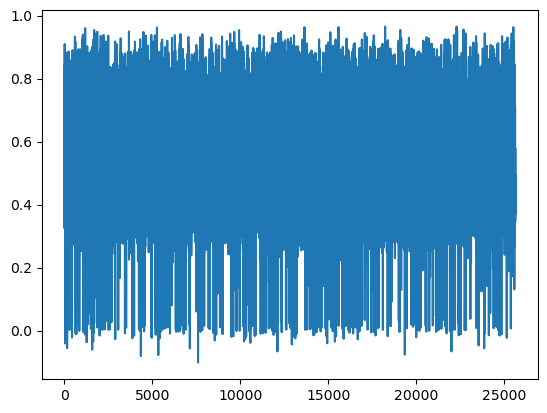

In [789]:
plt.plot(pred2)

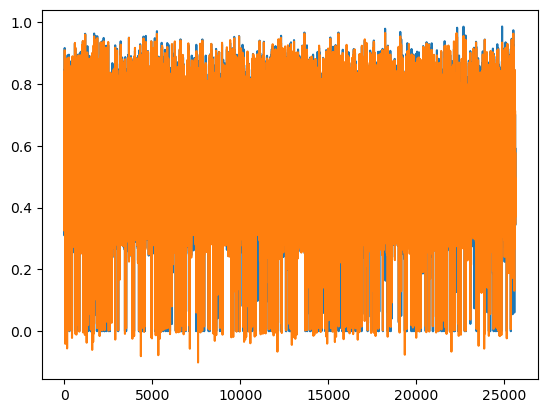

In [790]:
plt.plot(range(25632), y2_scaled[:25632],pred2) 

In [791]:
from sklearn.metrics import r2_score
r2_score(y2_scaled,pred2) #0.97

0.9741913478804862

In [792]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 均方误差
print(mean_squared_error(y2_scaled, pred2))

# 均方根误差
print(np.sqrt(mean_squared_error(y2_scaled, pred2)))

# R2 分数
print(r2_score(y2_scaled, pred2))


0.0004967069556917365
0.022286923423652186
0.9741913478804862


### 预测

In [793]:
#导入真实预测数据

In [794]:
load_test = pd.read_csv('E:\\IT\\大四\\python机器学习\\基于中短期能源预测\\中短期能源消耗预测\\data\\load_test.csv',encoding='gbk')

In [795]:
load_test.columns=['time','total_power']

In [796]:
load_test

,time,total_power
0,2021/9/1 0:00\t,NaN
1,2021/9/1 0:15\t,NaN
2,2021/9/1 0:30\t,NaN
3,2021/9/1 0:45\t,NaN
4,2021/9/1 1:00\t,NaN
...,...,...
955,2021/9/10 22:45\t,NaN
956,2021/9/10 23:00\t,NaN
957,2021/9/10 23:15\t,NaN
958,2021/9/10 23:30\t,NaN


In [797]:
# 假设'date_time'是日期时间列的列名
load_test['time'] = load_test['time'].str.replace('\t', '')
load_test

,time,total_power
0,2021/9/1 0:00,NaN
1,2021/9/1 0:15,NaN
2,2021/9/1 0:30,NaN
3,2021/9/1 0:45,NaN
4,2021/9/1 1:00,NaN
...,...,...
955,2021/9/10 22:45,NaN
956,2021/9/10 23:00,NaN
957,2021/9/10 23:15,NaN
958,2021/9/10 23:30,NaN


In [798]:
load_test['year'] = pd.to_datetime(load_test['time'], format='%Y/%m/%d %H:%M').dt.year

In [799]:
load_test['months'] = pd.to_datetime(load_test['time'], format='%Y/%m/%d %H:%M').dt.month

In [800]:
load_test['day'] = pd.to_datetime(load_test['time'], format='%Y/%m/%d %H:%M').dt.day

In [801]:
load_test['hour'] = pd.to_datetime(load_test['time'], format='%Y/%m/%d %H:%M').dt.hour

In [802]:
load_test['minute'] = pd.to_datetime(load_test['time'], format='%Y/%m/%d %H:%M').dt.minute

In [803]:
load_test

,time,total_power,year,months,day,hour,minute
0,2021/9/1 0:00,NaN,2021,9,1,0,0
1,2021/9/1 0:15,NaN,2021,9,1,0,15
2,2021/9/1 0:30,NaN,2021,9,1,0,30
3,2021/9/1 0:45,NaN,2021,9,1,0,45
4,2021/9/1 1:00,NaN,2021,9,1,1,0
...,...,...,...,...,...,...,...
955,2021/9/10 22:45,NaN,2021,9,10,22,45
956,2021/9/10 23:00,NaN,2021,9,10,23,0
957,2021/9/10 23:15,NaN,2021,9,10,23,15
958,2021/9/10 23:30,NaN,2021,9,10,23,30


In [804]:
# load_test = load_test.drop('time', axis=1)

In [805]:
load_test['state'] = 0

In [806]:
load_test

,time,total_power,year,months,day,hour,minute,state
0,2021/9/1 0:00,NaN,2021,9,1,0,0,0
1,2021/9/1 0:15,NaN,2021,9,1,0,15,0
2,2021/9/1 0:30,NaN,2021,9,1,0,30,0
3,2021/9/1 0:45,NaN,2021,9,1,0,45,0
4,2021/9/1 1:00,NaN,2021,9,1,1,0,0
...,...,...,...,...,...,...,...,...
955,2021/9/10 22:45,NaN,2021,9,10,22,45,0
956,2021/9/10 23:00,NaN,2021,9,10,23,0,0
957,2021/9/10 23:15,NaN,2021,9,10,23,15,0
958,2021/9/10 23:30,NaN,2021,9,10,23,30,0


In [807]:
#数据经过excel处理，将值划分为两列time和state，方便后续插入eletric中
tickets_test = pd.read_excel('E:\\IT\\大四\\python机器学习\\基于中短期能源预测\\中短期能源消耗预测\\data\\work_tickets_test.xlsx')

In [808]:
tickets_test

,time,state
0,2021-09-02 05:15:00,全开
1,2021-09-02 21:30:00,半开
2,2021-09-03 12:00:00,半开
3,2021-09-03 13:30:00,全开
4,2021-09-03 19:30:00,半开
5,2021-09-04 12:30:00,半开
6,2021-09-05 05:45:00,全开
7,2021-09-08 18:15:00,半开
8,2021-09-10 15:00:00,半开
9,2021-09-10 23:15:00,全开


In [809]:
# 使用 replace 方法替换值  我们用replace对其替换
tickets_test['state'].replace({'半开': 1,'全开': 2}, inplace=True)

In [810]:
# 遍历 df1 的每一行
for index, row in load_test.iterrows():
    time_to_find = row['time']  
    corresponding_row = tickets_test[tickets_test['time'] == time_to_find]
    if not corresponding_row.empty:
        load_test.at[index, 'state'] = corresponding_row['state'].values[0]

In [811]:
load_work_test=load_test

In [812]:
load_work_test

,time,total_power,year,months,day,hour,minute,state
0,2021/9/1 0:00,NaN,2021,9,1,0,0,0
1,2021/9/1 0:15,NaN,2021,9,1,0,15,0
2,2021/9/1 0:30,NaN,2021,9,1,0,30,0
3,2021/9/1 0:45,NaN,2021,9,1,0,45,0
4,2021/9/1 1:00,NaN,2021,9,1,1,0,0
...,...,...,...,...,...,...,...,...
955,2021/9/10 22:45,NaN,2021,9,10,22,45,0
956,2021/9/10 23:00,NaN,2021,9,10,23,0,0
957,2021/9/10 23:15,NaN,2021,9,10,23,15,2
958,2021/9/10 23:30,NaN,2021,9,10,23,30,0


In [813]:
#导入气象表

In [814]:
qixiang=pd.read_csv('E:\\IT\\大四\\python机器学习\\基于中短期能源预测\\中短期能源消耗预测\\data\\weather_test.csv',encoding='gbk')

In [815]:
qixiang.duplicated().sum()

0

In [816]:
qixiang = qixiang.drop_duplicates(keep='first')

In [817]:

series = qixiang.join(qixiang['天气状况'].str.split('/',expand=True))
qixiang['天气1'] = series[0]
qixiang['天气2'] = series[1]

In [818]:
qixiang['天气1'].unique()

array(['雷阵雨', '多云', '阵雨', '中雨', '阴', '晴', '小雨'], dtype=object)

In [819]:
qixiang['天气2'].unique()

array(['雷阵雨', '多云', '晴', '中雨', '阵雨', '阴', '暴雨', '小雨'], dtype=object)

In [820]:
qixiang['天气1']=qixiang['天气1'].str.replace('-','到')

In [821]:
qixiang['天气2']=qixiang['天气2'].str.replace('-','到')

In [822]:
qixiang['天气1'].unique()


array(['雷阵雨', '多云', '阵雨', '中雨', '阴', '晴', '小雨'], dtype=object)

In [823]:
qixiang['天气2'].unique()

array(['雷阵雨', '多云', '晴', '中雨', '阵雨', '阴', '暴雨', '小雨'], dtype=object)

In [824]:
dic1 = {'雾':0,
        '晴':1, 
        '多云':2,
        '阴':3, 
        '小雨':4,
        '小到中雨':5, 
        '中雨':6,
        '中到大雨':7,
        '大雨':8,
        '雷阵雨':9,
        '阵雨':10,
        '大到暴雨':11,
        '晴间多云':12,
        '暴雨':13,
        '小雨到中雨':14,
        '中雨到大雨':15,
        '局部多云':16
       }
qixiang['天气1'] = qixiang['天气1'].map(dic1)
qixiang['天气2'] = qixiang['天气2'].map(dic1)
qixiang

,日期,天气状况,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2
0,2021年9月1日,雷阵雨/雷阵雨,33℃,26℃,北风1-2级,北风1-2级,9,9
1,2021年9月2日,多云/多云,33℃,26℃,北风1-2级,北风1-2级,2,2
2,2021年9月3日,多云/多云,35℃,27℃,北风1-2级,北风1-2级,2,2
3,2021年9月4日,阵雨/多云,35℃,27℃,北风1-2级,北风1-2级,10,2
4,2021年9月5日,阵雨/晴,35℃,27℃,北风1-2级,北风1-2级,10,1
...,...,...,...,...,...,...,...,...
86,2021年11月26日,晴/晴,24℃,14℃,北风1-2级,北风1-2级,1,1
87,2021年11月27日,晴/晴,24℃,15℃,北风1-2级,北风1-2级,1,1
88,2021年11月28日,多云/晴,25℃,15℃,北风1-2级,北风1-2级,2,1
89,2021年11月29日,多云/多云,26℃,15℃,北风3-4级,北风3-4级,2,2


In [825]:
qixiang

,日期,天气状况,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2
0,2021年9月1日,雷阵雨/雷阵雨,33℃,26℃,北风1-2级,北风1-2级,9,9
1,2021年9月2日,多云/多云,33℃,26℃,北风1-2级,北风1-2级,2,2
2,2021年9月3日,多云/多云,35℃,27℃,北风1-2级,北风1-2级,2,2
3,2021年9月4日,阵雨/多云,35℃,27℃,北风1-2级,北风1-2级,10,2
4,2021年9月5日,阵雨/晴,35℃,27℃,北风1-2级,北风1-2级,10,1
...,...,...,...,...,...,...,...,...
86,2021年11月26日,晴/晴,24℃,14℃,北风1-2级,北风1-2级,1,1
87,2021年11月27日,晴/晴,24℃,15℃,北风1-2级,北风1-2级,1,1
88,2021年11月28日,多云/晴,25℃,15℃,北风1-2级,北风1-2级,2,1
89,2021年11月29日,多云/多云,26℃,15℃,北风3-4级,北风3-4级,2,2


In [826]:
qixiang.drop(columns=['天气状况'], axis=1, inplace=True)


In [827]:
qixiang[['最高温度','最低温度']] = qixiang[['最高温度','最低温度']].astype(str)
qixiang[['最高温度','最低温度']] = qixiang[['最高温度','最低温度']].apply(lambda x: x.str.replace('℃','').replace('', '0'))
qixiang.head()

,日期,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2
0,2021年9月1日,33,26,北风1-2级,北风1-2级,9,9
1,2021年9月2日,33,26,北风1-2级,北风1-2级,2,2
2,2021年9月3日,35,27,北风1-2级,北风1-2级,2,2
3,2021年9月4日,35,27,北风1-2级,北风1-2级,10,2
4,2021年9月5日,35,27,北风1-2级,北风1-2级,10,1


In [828]:
qixiang[['最高温度','最低温度']] = qixiang[['最高温度','最低温度']].astype(int)
qixiang['平均温度'] = (qixiang['最高温度'] + qixiang['最低温度']) / 2
qixiang

,日期,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2,平均温度
0,2021年9月1日,33,26,北风1-2级,北风1-2级,9,9,29.5
1,2021年9月2日,33,26,北风1-2级,北风1-2级,2,2,29.5
2,2021年9月3日,35,27,北风1-2级,北风1-2级,2,2,31.0
3,2021年9月4日,35,27,北风1-2级,北风1-2级,10,2,31.0
4,2021年9月5日,35,27,北风1-2级,北风1-2级,10,1,31.0
...,...,...,...,...,...,...,...,...
86,2021年11月26日,24,14,北风1-2级,北风1-2级,1,1,19.0
87,2021年11月27日,24,15,北风1-2级,北风1-2级,1,1,19.5
88,2021年11月28日,25,15,北风1-2级,北风1-2级,2,1,20.0
89,2021年11月29日,26,15,北风3-4级,北风3-4级,2,2,20.5


In [829]:
qixiang_test=qixiang

In [830]:

qixiang_test['日期'] = pd.to_datetime(qixiang_test['日期'],format='%Y年%m月%d日')
qixiang_test['IsWeekend'] = qixiang_test['日期'].apply(is_weekend)
qixiang_test['IsWeekend'] = qixiang_test['IsWeekend'].replace({True: 1, False: 0})
qixiang_test

,日期,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2,平均温度,IsWeekend
0,2021-09-01,33,26,北风1-2级,北风1-2级,9,9,29.5,0
1,2021-09-02,33,26,北风1-2级,北风1-2级,2,2,29.5,0
2,2021-09-03,35,27,北风1-2级,北风1-2级,2,2,31.0,0
3,2021-09-04,35,27,北风1-2级,北风1-2级,10,2,31.0,1
4,2021-09-05,35,27,北风1-2级,北风1-2级,10,1,31.0,1
...,...,...,...,...,...,...,...,...,...
86,2021-11-26,24,14,北风1-2级,北风1-2级,1,1,19.0,0
87,2021-11-27,24,15,北风1-2级,北风1-2级,1,1,19.5,1
88,2021-11-28,25,15,北风1-2级,北风1-2级,2,1,20.0,1
89,2021-11-29,26,15,北风3-4级,北风3-4级,2,2,20.5,0


In [831]:
qixiang_test['白天风力风向']=qixiang_test['白天风力风向'].str.replace('-','～')

In [832]:
qixiang_test['夜晚风力风向']=qixiang_test['夜晚风力风向'].str.replace('-','～')

In [833]:
qixiang_test['白天风力风向'].unique()

array(['北风1～2级', '西北风1～2级', '东北风4～5级', '东风3～4级', '北风3～4级', '北风4～5级'],
      dtype=object)

In [834]:
qixiang_test['夜晚风力风向'].unique()

array(['北风1～2级', '西北风1～2级', '东北风4～5级', '东风3～4级', '北风3～4级', '北风4～5级'],
      dtype=object)

In [835]:
dic1 = {'无持续风向<3级':0,'北风3～4级':1,'北风4～5级':2,'微风<3级':3,'北风3':4,'东北风3～4级':5,'东北偏东风2':6,
       '南风3～4级':7,'南风4～5级':8,'无持续风向微风':9,'无持续风向1～2级':10,'东风3～4级':11,'东南风4～5级':12,
       '东风8～9级':13,'东南风3～4级':14,'南风1～2级':15,'东南风1～2级':16,'西南风3～4级':17,'东风1～2级':18,
       '北风1～2级':18,'东北风1～2级':19,'西南风1～2级':20,'东风1～2级':21
      }
qixiang_test['白天风力风向'] = qixiang_test['白天风力风向'].map(dic1)
qixiang_test['夜晚风力风向'] = qixiang_test['夜晚风力风向'].map(dic1)

In [836]:
qixiang

,日期,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2,平均温度,IsWeekend
0,2021-09-01,33,26,18.0,18.0,9,9,29.5,0
1,2021-09-02,33,26,18.0,18.0,2,2,29.5,0
2,2021-09-03,35,27,18.0,18.0,2,2,31.0,0
3,2021-09-04,35,27,18.0,18.0,10,2,31.0,1
4,2021-09-05,35,27,18.0,18.0,10,1,31.0,1
...,...,...,...,...,...,...,...,...,...
86,2021-11-26,24,14,18.0,18.0,1,1,19.0,0
87,2021-11-27,24,15,18.0,18.0,1,1,19.5,1
88,2021-11-28,25,15,18.0,18.0,2,1,20.0,1
89,2021-11-29,26,15,1.0,1.0,2,2,20.5,0


In [837]:
load_work_test

,time,total_power,year,months,day,hour,minute,state
0,2021/9/1 0:00,NaN,2021,9,1,0,0,0
1,2021/9/1 0:15,NaN,2021,9,1,0,15,0
2,2021/9/1 0:30,NaN,2021,9,1,0,30,0
3,2021/9/1 0:45,NaN,2021,9,1,0,45,0
4,2021/9/1 1:00,NaN,2021,9,1,1,0,0
...,...,...,...,...,...,...,...,...
955,2021/9/10 22:45,NaN,2021,9,10,22,45,0
956,2021/9/10 23:00,NaN,2021,9,10,23,0,0
957,2021/9/10 23:15,NaN,2021,9,10,23,15,2
958,2021/9/10 23:30,NaN,2021,9,10,23,30,0


In [838]:
qixiang_test

,日期,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2,平均温度,IsWeekend
0,2021-09-01,33,26,18.0,18.0,9,9,29.5,0
1,2021-09-02,33,26,18.0,18.0,2,2,29.5,0
2,2021-09-03,35,27,18.0,18.0,2,2,31.0,0
3,2021-09-04,35,27,18.0,18.0,10,2,31.0,1
4,2021-09-05,35,27,18.0,18.0,10,1,31.0,1
...,...,...,...,...,...,...,...,...,...
86,2021-11-26,24,14,18.0,18.0,1,1,19.0,0
87,2021-11-27,24,15,18.0,18.0,1,1,19.5,1
88,2021-11-28,25,15,18.0,18.0,2,1,20.0,1
89,2021-11-29,26,15,1.0,1.0,2,2,20.5,0


In [839]:
load_work_test['date'] = pd.to_datetime(pd.to_datetime(load_work_test['time']).dt.date)
qixiang_test['日期'] = pd.to_datetime(qixiang_test['日期'], errors='coerce')
load_work_qixiang_test= pd.merge(load_work_test, qixiang_test ,left_on='date', right_on='日期', how='left')
load_work_qixiang_test

,time,total_power,year,months,day,hour,minute,state,date,日期,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2,平均温度,IsWeekend
0,2021/9/1 0:00,NaN,2021,9,1,0,0,0,2021-09-01,2021-09-01,33,26,18.0,18.0,9,9,29.5,0
1,2021/9/1 0:15,NaN,2021,9,1,0,15,0,2021-09-01,2021-09-01,33,26,18.0,18.0,9,9,29.5,0
2,2021/9/1 0:30,NaN,2021,9,1,0,30,0,2021-09-01,2021-09-01,33,26,18.0,18.0,9,9,29.5,0
3,2021/9/1 0:45,NaN,2021,9,1,0,45,0,2021-09-01,2021-09-01,33,26,18.0,18.0,9,9,29.5,0
4,2021/9/1 1:00,NaN,2021,9,1,1,0,0,2021-09-01,2021-09-01,33,26,18.0,18.0,9,9,29.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2021/9/10 22:45,NaN,2021,9,10,22,45,0,2021-09-10,2021-09-10,36,28,18.0,18.0,9,2,32.0,0
956,2021/9/10 23:00,NaN,2021,9,10,23,0,0,2021-09-10,2021-09-10,36,28,18.0,18.0,9,2,32.0,0
957,2021/9/10 23:15,NaN,2021,9,10,23,15,2,2021-09-10,2021-09-10,36,28,18.0,18.0,9,2,32.0,0
958,2021/9/10 23:30,NaN,2021,9,10,23,30,0,2021-09-10,2021-09-10,36,28,18.0,18.0,9,2,32.0,0


In [840]:
load_work_qixiang_test

,time,total_power,year,months,day,hour,minute,state,date,日期,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2,平均温度,IsWeekend
0,2021/9/1 0:00,NaN,2021,9,1,0,0,0,2021-09-01,2021-09-01,33,26,18.0,18.0,9,9,29.5,0
1,2021/9/1 0:15,NaN,2021,9,1,0,15,0,2021-09-01,2021-09-01,33,26,18.0,18.0,9,9,29.5,0
2,2021/9/1 0:30,NaN,2021,9,1,0,30,0,2021-09-01,2021-09-01,33,26,18.0,18.0,9,9,29.5,0
3,2021/9/1 0:45,NaN,2021,9,1,0,45,0,2021-09-01,2021-09-01,33,26,18.0,18.0,9,9,29.5,0
4,2021/9/1 1:00,NaN,2021,9,1,1,0,0,2021-09-01,2021-09-01,33,26,18.0,18.0,9,9,29.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2021/9/10 22:45,NaN,2021,9,10,22,45,0,2021-09-10,2021-09-10,36,28,18.0,18.0,9,2,32.0,0
956,2021/9/10 23:00,NaN,2021,9,10,23,0,0,2021-09-10,2021-09-10,36,28,18.0,18.0,9,2,32.0,0
957,2021/9/10 23:15,NaN,2021,9,10,23,15,2,2021-09-10,2021-09-10,36,28,18.0,18.0,9,2,32.0,0
958,2021/9/10 23:30,NaN,2021,9,10,23,30,0,2021-09-10,2021-09-10,36,28,18.0,18.0,9,2,32.0,0


In [841]:
#df.index=df['日期_x']
load_work_qixiang_test=pd.DataFrame(load_work_qixiang_test)
load_work_qixiang_test.drop(columns='日期',inplace=True)
load_work_qixiang_test.drop(columns='date',inplace=True)
load_work_qixiang_test


,time,total_power,year,months,day,hour,minute,state,最高温度,最低温度,白天风力风向,夜晚风力风向,天气1,天气2,平均温度,IsWeekend
0,2021/9/1 0:00,NaN,2021,9,1,0,0,0,33,26,18.0,18.0,9,9,29.5,0
1,2021/9/1 0:15,NaN,2021,9,1,0,15,0,33,26,18.0,18.0,9,9,29.5,0
2,2021/9/1 0:30,NaN,2021,9,1,0,30,0,33,26,18.0,18.0,9,9,29.5,0
3,2021/9/1 0:45,NaN,2021,9,1,0,45,0,33,26,18.0,18.0,9,9,29.5,0
4,2021/9/1 1:00,NaN,2021,9,1,1,0,0,33,26,18.0,18.0,9,9,29.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2021/9/10 22:45,NaN,2021,9,10,22,45,0,36,28,18.0,18.0,9,2,32.0,0
956,2021/9/10 23:00,NaN,2021,9,10,23,0,0,36,28,18.0,18.0,9,2,32.0,0
957,2021/9/10 23:15,NaN,2021,9,10,23,15,2,36,28,18.0,18.0,9,2,32.0,0
958,2021/9/10 23:30,NaN,2021,9,10,23,30,0,36,28,18.0,18.0,9,2,32.0,0


In [842]:
# 修改列名
new_column_names = {
    '最高温度': 'Max_Temperature',
    '最低温度': 'Min_Temperature',
    '白天风力风向': 'Day_Wind',
    '夜晚风力风向': 'Night_Wind',
    '天气1': 'Weather1',
    '天气2': 'Weather2',
    '平均温度': 'Average_Temperature'
    
}

load_work_qixiang_test = load_work_qixiang_test.rename(columns=new_column_names)

In [843]:
load_work_qixiang_test

,time,total_power,year,months,day,hour,minute,state,Max_Temperature,Min_Temperature,Day_Wind,Night_Wind,Weather1,Weather2,Average_Temperature,IsWeekend
0,2021/9/1 0:00,NaN,2021,9,1,0,0,0,33,26,18.0,18.0,9,9,29.5,0
1,2021/9/1 0:15,NaN,2021,9,1,0,15,0,33,26,18.0,18.0,9,9,29.5,0
2,2021/9/1 0:30,NaN,2021,9,1,0,30,0,33,26,18.0,18.0,9,9,29.5,0
3,2021/9/1 0:45,NaN,2021,9,1,0,45,0,33,26,18.0,18.0,9,9,29.5,0
4,2021/9/1 1:00,NaN,2021,9,1,1,0,0,33,26,18.0,18.0,9,9,29.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2021/9/10 22:45,NaN,2021,9,10,22,45,0,36,28,18.0,18.0,9,2,32.0,0
956,2021/9/10 23:00,NaN,2021,9,10,23,0,0,36,28,18.0,18.0,9,2,32.0,0
957,2021/9/10 23:15,NaN,2021,9,10,23,15,2,36,28,18.0,18.0,9,2,32.0,0
958,2021/9/10 23:30,NaN,2021,9,10,23,30,0,36,28,18.0,18.0,9,2,32.0,0


In [844]:
load_work_qixiang_test.drop(columns='time', inplace=True)

In [845]:
load_work_qixiang_test

,total_power,year,months,day,hour,minute,state,Max_Temperature,Min_Temperature,Day_Wind,Night_Wind,Weather1,Weather2,Average_Temperature,IsWeekend
0,NaN,2021,9,1,0,0,0,33,26,18.0,18.0,9,9,29.5,0
1,NaN,2021,9,1,0,15,0,33,26,18.0,18.0,9,9,29.5,0
2,NaN,2021,9,1,0,30,0,33,26,18.0,18.0,9,9,29.5,0
3,NaN,2021,9,1,0,45,0,33,26,18.0,18.0,9,9,29.5,0
4,NaN,2021,9,1,1,0,0,33,26,18.0,18.0,9,9,29.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,NaN,2021,9,10,22,45,0,36,28,18.0,18.0,9,2,32.0,0
956,NaN,2021,9,10,23,0,0,36,28,18.0,18.0,9,2,32.0,0
957,NaN,2021,9,10,23,15,2,36,28,18.0,18.0,9,2,32.0,0
958,NaN,2021,9,10,23,30,0,36,28,18.0,18.0,9,2,32.0,0


In [847]:
# 将指定列转换为整数类型
columns_to_convert = ['state', 'year', 'months', 'day', 'hour', 'minute', 'Max_Temperature', 'Min_Temperature', 'Day_Wind', 'Night_Wind', 'Weather1','Weather2', 'IsWeekend']

for column in columns_to_convert:
    load_work_qixiang_test[column] = load_work_qixiang_test[column].astype(int)

In [848]:
### 数据划分
xcol = ['state', 'year', 'months', 'day', 'hour', 'minute', 'Max_Temperature', 'Min_Temperature', 'Day_Wind', 'Night_Wind', 'Weather1','Weather2', 'IsWeekend']
x3 = load_work_qixiang_test[xcol]
y3 = load_work_qixiang_test['total_power']


In [849]:
from xgboost import XGBClassifier, XGBRegressor
pred3 = xgb.predict(x3)

In [850]:
print(pred3)

[ 5.5615741e-01  5.3699994e-01  5.3708923e-01  5.3602821e-01
  5.5188316e-01  5.1299274e-01  5.1308203e-01  5.1162946e-01
  5.4328591e-01  5.0097966e-01  5.0106895e-01  4.9961641e-01
  5.3475446e-01  4.9075884e-01  4.9084806e-01  4.9051407e-01
  5.2458334e-01  4.8441640e-01  4.8494110e-01  4.8449740e-01
  5.2431351e-01  4.8414654e-01  4.8467124e-01  4.8422754e-01
  5.2815664e-01  4.8525801e-01  4.8814237e-01  4.8846304e-01
  5.3182423e-01  5.1122177e-01  5.1410615e-01  5.2286351e-01
  5.7710594e-01  5.6009901e-01  5.6783247e-01  5.7693470e-01
  6.5777159e-01  6.2942427e-01  6.3558519e-01  6.4034569e-01
  7.0440173e-01  6.5009797e-01  6.5116489e-01  6.5155667e-01
  7.0862609e-01  6.5263522e-01  6.5157193e-01  6.4902550e-01
  7.0037043e-01  6.3969088e-01  6.3992298e-01  6.4036226e-01
  6.9809556e-01  6.4192337e-01  6.4159071e-01  6.4337552e-01
  7.0226532e-01  6.4741635e-01  6.4708370e-01  6.4733624e-01
  7.0385385e-01  6.4900488e-01  6.4856553e-01  6.4777267e-01
  7.0385385e-01  6.49004

In [853]:
from sklearn.preprocessing import MinMaxScaler

pred3 = np.array(pred3)
pred3 = pred3.reshape(-1, 1)
# 对预测结果进行逆归一化
denormalized_pred3 = scaler.inverse_transform(pred3)

In [856]:
denormalized_pred3_xlsx = pd.DataFrame(denormalized_pred3, columns=['total_power'])

In [857]:
denormalized_pred3

array([[ 2.05555781e+05],
       [ 1.98475172e+05],
       [ 1.98508172e+05],
       [ 1.98116031e+05],
       [ 2.03976016e+05],
       [ 1.89602109e+05],
       [ 1.89635125e+05],
       [ 1.89098250e+05],
       [ 2.00798469e+05],
       [ 1.85162078e+05],
       [ 1.85195078e+05],
       [ 1.84658234e+05],
       [ 1.97645250e+05],
       [ 1.81384469e+05],
       [ 1.81417438e+05],
       [ 1.81294000e+05],
       [ 1.93886000e+05],
       [ 1.79040297e+05],
       [ 1.79234234e+05],
       [ 1.79070234e+05],
       [ 1.93786266e+05],
       [ 1.78940562e+05],
       [ 1.79134484e+05],
       [ 1.78970500e+05],
       [ 1.95206688e+05],
       [ 1.79351359e+05],
       [ 1.80417422e+05],
       [ 1.80535938e+05],
       [ 1.96562234e+05],
       [ 1.88947562e+05],
       [ 1.90013641e+05],
       [ 1.93250359e+05],
       [ 2.13298359e+05],
       [ 2.07012594e+05],
       [ 2.09870875e+05],
       [ 2.13235062e+05],
       [ 2.43112375e+05],
       [ 2.32635219e+05],
       [ 2.3

In [858]:
for item in denormalized_pred3:
    print(item[0])

205555.78
198475.17
198508.17
198116.03
203976.02
189602.11
189635.12
189098.25
200798.47
185162.08
185195.08
184658.23
197645.25
181384.47
181417.44
181294.0
193886.0
179040.3
179234.23
179070.23
193786.27
178940.56
179134.48
178970.5
195206.69
179351.36
180417.42
180535.94
196562.23
188947.56
190013.64
193250.36
213298.36
207012.6
209870.88
213235.06
243112.38
232635.22
234912.28
236671.77
260346.88
240276.2
240670.55
240815.34
261908.2
241213.97
240820.98
239879.83
258856.9
236429.75
236515.53
236677.89
258016.12
237254.88
237131.92
237791.6
259557.27
239285.08
239162.14
239255.47
260144.38
239872.2
239709.81
239416.78
260144.38
239872.2
239709.81
239416.78
257141.22
233753.14
232035.38
228027.06
241113.1
222369.84
221199.27
220849.84
232585.36
215581.95
214860.25
214510.83
229204.73
207659.11
206937.4
206587.98
222481.86
203215.97
202494.27
202144.84
214916.45
194749.33
194133.36
191823.39
207981.22
190012.81
189396.84
186953.33
213534.42
197544.39
197346.34
197557.92
213855.3
1963

In [859]:
#导出预测结果
denormalized_pred3_xlsx.to_excel('E:\\IT\\大四\\python机器学习\\基于中短期能源预测\\中短期能源消耗预测\\data\\预测结果\\predict.xlsx', index=False)


In [867]:
predict_end = pd.read_excel('E:\\IT\\大四\\python机器学习\\基于中短期能源预测\\中短期能源消耗预测\\data\\预测结果\\predict.xlsx',)
predict_end

,time,total_power
0,2021/9/1 0:00\t,201526.828125
1,2021/9/1 0:15\t,186965.281250
2,2021/9/1 0:30\t,186828.140625
3,2021/9/1 0:45\t,186270.171875
4,2021/9/1 1:00\t,202177.812500
...,...,...
955,2021/9/10 22:45\t,199349.781250
956,2021/9/10 23:00\t,224431.921875
957,2021/9/10 23:15\t,-2984.780029
958,2021/9/10 23:30\t,198898.234375


In [868]:
# 假设'date_time'是日期时间列的列名
predict_end['time'] = predict_end['time'].str.replace('\t', '')
predict_end

,time,total_power
0,2021/9/1 0:00,201526.828125
1,2021/9/1 0:15,186965.281250
2,2021/9/1 0:30,186828.140625
3,2021/9/1 0:45,186270.171875
4,2021/9/1 1:00,202177.812500
...,...,...
955,2021/9/10 22:45,199349.781250
956,2021/9/10 23:00,224431.921875
957,2021/9/10 23:15,-2984.780029
958,2021/9/10 23:30,198898.234375


In [869]:
# 选择你要查找最大最小值的列
column_name = 'total_power'  # 请用你的列名替换 'Your_Column_Name'

# 获取特定列的最大和最小值
max_value = predict_end[column_name].max()
min_value = predict_end[column_name].min()
# 查找最大最小值所在的时间列（假设时间列名为 'timestamp'）
time_at_max = predict_end[predict_end[column_name] == max_value]['time']
time_at_min = predict_end[predict_end[column_name] == min_value]['time']

print(f"最大值: {max_value}")
print(f"最小值: {min_value}")
print(f"最大值对应的时间: {time_at_max}")
print(f"最小值对应的时间: {time_at_min}")

最大值: 289115.90625
最小值: -2984.780029296875
最大值对应的时间: 620    2021/9/7 11:00
Name: time, dtype: object
最小值对应的时间: 957    2021/9/10 23:15
Name: time, dtype: object
